In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Day 16: Linear Interpolation Methods

In the previous notebook we introduced the method of *bisection* to close in on a root of a function $f\left(x\right)$, given a *bracketed* interval $\left[x_1, x_2\right]$. We saw that the bisection method gets closer to the root by halving the bracketed interval at each interation and choosing the half-interval over which $f\left(x\right)$ remains *bracketed* to continue searching within.

Rather than simply choosing the midpoint of the current bracketed interval as an enpoint for the next iteration, *linear interpolation* methods construct linear approximations of $f\left(x\right)$ and use the root of the linear interpolant as an endpoint for their next iteration. See the plot below as an example.

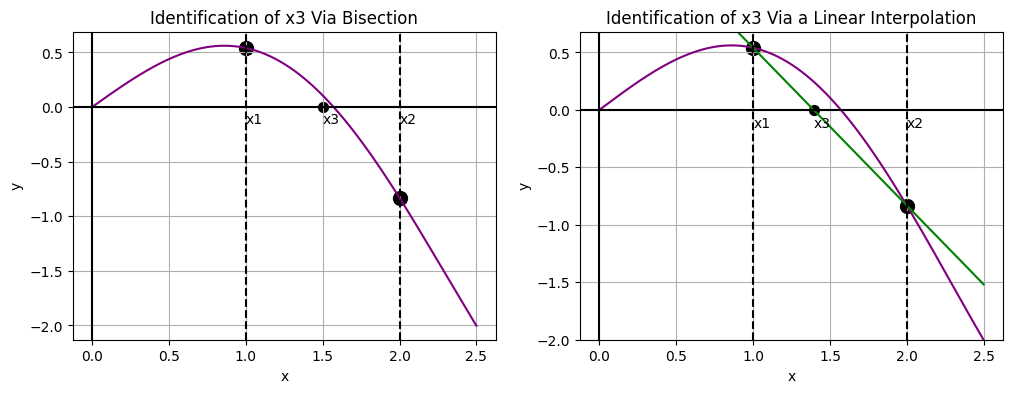

In [ ]:
#@title
x_vals = np.linspace(0, 2.5, 250)
y_vals = x_vals*np.cos(x_vals)

x1 = 1
x2 = 2
y1 = x1*np.cos(x1)
y2 = x2*np.cos(x2)

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, color = "purple")
plt.scatter([x1, x2], [y1, y2], color = "black", s = 100)
plt.scatter((x1 + x2)/2, 0, color = "black", s = 50)
plt.annotate("x1", (x1, -0.15))
plt.annotate("x3", ((x1 + x2)/2, -0.15))
plt.annotate("x2", (x2, -0.15))
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.axvline(x = 1, color = "black", ls = "--")
plt.axvline(x = 2, color = "black", ls = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Identification of x3 Via Bisection")

m = (y2 - y1)/(x2 - x1)
y2_vals = m*(x_vals - x1) + y1
x3 = -y1/m + x1

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, color = "purple")
plt.plot(x_vals, y2_vals, color = "green")
plt.scatter([x1, x2], [y1, y2], color = "black", s = 100)
plt.scatter(x3, 0, color = "black", s = 50)
plt.annotate("x1", (x1, -0.15))
plt.annotate("x3", (x3, -0.15))
plt.annotate("x2", (x2, -0.15))
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.axvline(x = 1, color = "black", ls = "--")
plt.axvline(x = 2, color = "black", ls = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Identification of x3 Via a Linear Interpolation")
plt.ylim((-2, 0.68))

plt.show()

## Basic Linear Interpolation Strategies for Root-Finding

There are two very basic types of *linear interpolation* -- the *secant method* and the *false position method*. Both of which are being illustrated in the graph on the right above. They differ in two ways -- (i) the *secant method* does not require a bracketed interval but the *false position method* does, and (ii) the *secant method* always chooses the interval between $x_2$ and $x_3$ as the interval for its next iteration, where the *false position method* chooses the bracketed interval.



### Secant Method

Given *any* interval, $\left[x_1, x_2\right]$, the strategy for the *secant* method is easy to describe:

1. Construct the secant line to $f\left(x\right)$ through $\left(x_1, f\left(x_1\right)\right)$ and $\left(x_2, f\left(x_2\right)\right)$.
2. Find the root associated with the secant line and label it $x_3$.
3. Replace $x_1$ with $x_2$ and replace $x_2$ with $x_3$
4. Repeat steps 1 - 3 until the stopping condition is reached.

  + **Note:** Running the *secant method* for too many iterations can result in incorrect results. A common stopping condition is to stop when the width of the interval is below some *tolerance*.

### False Position Methods

Given a *bracketed interval*, the strategy of the *false position method* is simple:

1. Construct the secant line to $f\left(x\right)$ through $\left(x_1, f\left(x_1\right)\right)$ and $\left(x_2, f\left(x_2\right)\right)$.
2. Find the root associated with the secant line and label it $x_3$.
3. If $\left[x_1, x_3\right]$ brackets $f\left(x\right)$, then replace $x_2$ with $x_3$. Otherwise, replace $x_1$ with $x_3$.
4. Repeat steps 1 - 3 until the desired accuracy is achieved.

Let's work through an example by hand to make sure we understand these procedures.

**Example:** The function $f\left(x\right) = x^2 - 5x + 3$ has a root on the interval $\left[0, 2\right]$. You Verified that this interval is bracketed and also carried out four iterations of the bisection method to approximate the value of the root in the previous notebook. Carry out three iterations of each of the *secant method* and *false position method* to approximate the root.

> *Solution.*

In [ ]:
#Try coding these if you like...

The convergence of the *secant method* is "super-linear" with order of convergence equal to $\varphi = \frac{1 + \sqrt{5}}{2}$ (not quite quadratic convergence), while the convergence of the *false position method* is also generally a little faster than linear but the exact rate of convergence cannot be computed. Neither the *secant method* nor *false position* methods have extremely fast convergence rates, so they aren't typically utilized in practice. In particular, *Ridder's Method* is a slight modification on the *false position method* with a quadratic rate of convergence. We'll develop and implement that method in the next section.

## Ridder's Method

Ridder's Method makes a modification to the *false position* method by constructing a linear interpolation which may *not* be a secant line to the function $f\left(x\right)$. Instead, it forces the three points $\left(x_1, g_1\right)$, $\left(x_2, g_2\right)$, and $\left(x_3, g_3\right)$ to lie along a straight line, where

$$g_i = g\left(x_i\right) = f\left(x_i\right)e^{\left(x_i - x_1\right)Q}$$

We'll need to solve for $Q$ during each iteration. The basic outline of the strategy for *Ridder's Method* is below.

**Strategy (Ridder's Method):** Given a function $f\left(x\right)$ and a *bracketed interval* $\left[x_1, x_2\right]$,

1. Let $\displaystyle{h = \frac{x_2 - x_1}{2}}$ and compute $\displaystyle{x_3 = x_1 + h}$. (*Note:* $x_3$ is the midpoint between $x_1$ and $x_2$)
2. Form the equations $g_1 = f\left(x_1\right)$, $g_2 = f\left(x_2\right)e^{2hQ}$, and $g_3 = f\left(x_3\right)e^{hQ}$, with $Q$ unknown.
3. Solve for $Q$ to force $\left(x_1, g_1\right)$, $\left(x_2, g_2\right)$, and $\left(x_3, g_3\right)$ to all lie along a straight line, $L$.
4. Solve for the root of $L$ and call it $x_4$.
5. Re-bracket the root as tightly as possible using either the endpoints $x_3$ and $x_4$, the interval $\left[x_1, x_4\right]$, or the interval $\left[x_4, x_2\right]$. Overwrite $x_1$ and $x_2$ with the endpoints of the new bracketed interval.
6. Repeat steps 1 - 5 until changes in successive values of $x_4$ fall below some tolerance. At which case, return $x_4$ as the approximate root.

We'll delve into more of the math involved in finding $Q$ below. While doing so it will be helpful to run an example alongside our work.



Each of the steps above is a simple function evaluation or comparison, except for step 3. We'll go into solving for $Q$ now, before attempting to write a routine to execute Ridder's Method.

**Example:** The function $f\left(x\right) = x^2 - 5x + 3$ has a root on the interval $\left[0, 2\right]$. Carry out two iterations of each of *Ridder's Method* to approximate the root.

> *Solution.*

### Solving for Q and Identifying $x_4$

For convenience, let's use the notation $f_i = f\left(x_i\right)$. In step 3 of *Ridder's Method*, we've constructed three points:

\begin{align*} \left(x_1, g_1\right) &= \left(x_1, f_1\right)\\
\left(x_2, g_2\right) &= \left(x_2, f_2e^{2hQ}\right)\\
\left(x_3, g_3\right) &= \left(x_3, f_3e^{hQ}\right)
\end{align*}

These three points will be collinear if $\displaystyle{g_3 = \frac{g_1 + g_2}{2}}$, or equivalently, $\displaystyle{f_3e^{hQ} = \frac{1}{2}\left(f_1 + f_2e^{2hQ}\right)}$. Notice the following:

\begin{align*} f_3e^{hQ} &= \frac{1}{2}\left(f_1 + f_2e^{2hQ}\right)\\
\implies 2f_3e^{hQ} = f_1 + f_2e^{2hQ}\\
\implies f_2\left(e^{hQ}\right)^2 - 2f_3\left(e^{hQ}\right) + f_1 &= 0\\
\stackrel{M = e^{hQ}}{\implies} f_2M^2 -2f_3M + f_1 &= 0\\
\stackrel{\text{Quad. Form.}}{\implies} M &= \frac{2f_3 \pm \sqrt{4f_3^2 - 4f_2f_1}}{2f_2}\\
\implies M &= \frac{f_3 \pm \sqrt{f_3^2 - f_2f_1}}{f_2}
\end{align*}

Now that we know $\displaystyle{e^{hQ} = \frac{f_3 \pm \sqrt{f_3^2 - f_1f_2}}{f_2}}$, we can use linear interpolation between $\left(x_1, g_1\right)$ and $\left(x_3, g_3\right)$ to obtain

$$y = \left(\frac{g_3 - g_1}{x_3 - x_1}\right)\left(x - x_3\right) + g_3$$

Solving for the root, $x_4$ gives

\begin{align*} 0 &= \left(\frac{g_3 - g_1}{x_3 - x_1}\right)\left(x - x_3\right) + g_3\\
\implies -g_3\left(\frac{x_3 - x_1}{g_3 - g_1}\right) &= x - x_3\\
\implies x &= x_3 - g_3\left(\frac{x_3 - x_1}{g_3 - g_1}\right)\\
\implies x &= x_3 - f_3e^{hQ}\left(\frac{x_3 - x_1}{f_3e^{hQ} - f_1}\right)\\
\implies x&= x_3 - \left(x_3 - x_1\right)\frac{f_3e^{hQ}}{f_3e^{hQ} - f_1}
\end{align*}

Replacing $e^{hQ}$ with $\displaystyle{\frac{f_3\pm\sqrt{f_3^2 - f_1f_2}}{f_2}}$ and doing some significant algebra work leads to

$$x = x_3 \pm \left(x_3 - x_1\right)\frac{f_3}{\sqrt{f_3^2 - f_1f_2}}$$

We'll choose $\displaystyle{x_4 = x_3 + \left(x_3 - x_1\right)\frac{f_3}{\sqrt{f_3^2 - f_1f_2}}}$ if $f_1 - f_2 > 0$ and $\displaystyle{x_4 = x_3 - \left(x_3 - x_1\right)\frac{f_3}{\sqrt{f_3^2 - f_1f_2}}}$ if $f_1 - f_2 < 0$. After identifying $x_4$, we'll determine whether $\left[x_1, x_4\right]$ or $\left[x_4, x_2\right]$ is bracketed, and we'll repeat the process again on the new interval.


## Ridder's Method as a Routine

Now that we've got the main components down, let's write a routine to execute Ridder's Method so that we don't need to run it by hand.

In [ ]:
## Ridder's Method
def ridder(f, a, b, tol = 1.0e-9):
  x1 = ___
  f1 = f(___)
  if f1 == 0:
    return ___

  x2 = ___
  f2 = f(___)
  if f2 == 0:
    return ___

  if np.sign(___) == np.sign(___):
    print("The root is not bracketed!")
    return None

  for i in range(30): #30 iterations just chosen -- you can change...
    x3 = ___
    f3 = ___

    s = ___

    if s == 0.0:
      return None

    dx = ___

    if (f1 - f2) < 0.0:
      dx = -dx

    x4 = ___
    f4 = ___

    #Test for convergence
    if i > 0:
      if abs(x4 - xOld) < tol*max(abs(x4), 1.0):
        return x4

    xOld = x4

    #Re-bracket the root as tightly as possible
    if np.sign(f3) == np.sign(f4):
      if np.sign(f1) != np.sign(f4):
        x2 = ___
        f2 = ___
      else:
        x1 = ___
        f1 = ___
    else:
      x1 = ___
      x2 = ___
      f1 = ___
      f2 = ___

  print("Too many iterations. Root-finding expedition did not converge.")
  return None

**Example:** Try running our *Ridder's Method* function to find the root of the function $f\left(x\right) = x^3 - 10x^2 + 5$ on the interval $\left[0.6, 0.8\right]$

In [ ]:
#Define the function f(x)

#Use Ridder's method to estimate the root


The root I estimated is at x =  0.7346035077893032


**Example:** Try running our *Ridder's Method* function to find the root of the function $\displaystyle{f\left(x\right) = \frac{1}{\left(x - 0.3\right)^2 + 0.01} - \frac{1}{\left(x - 0.8\right)^2 + 0.04}}$. Plot the function first to obtain an interval which brackets the root.

## The Newton-Raphson Method

You've probably heard of, and maybe used, "Newton's Method" for approximating the root of a function previously. It is one of the most well-known and commonly used methods for root-finding. The approach is simple:

1. Choose an initial guess for the root, $x_0$.
2. Construct the line tangent to $f\left(x\right)$ at $x_n$ (with $n$ starting at $0$).
3. Let $x_{n+1}$ be the root of the tangent line to $f\left(x\right)$ at $x_n$.
4. Repeat steps 2 and 3 until a convergence criteria is met or a maximum number of iterations is run.

The *Newton-Raphson Method* is so often used because it is simple and fast. The drawback to this method is that it requires evaluating the original function $f\left(x\right)$ and its derivative, $f'\left(x\right)$, at each iteration. This means that the method is only applicable in scenarios where $f'\left(x\right)$ can be obtained.

The convergence of the *Newton-Raphson Method* (using tangent lines to find roots) depends on the proximity of $x_n$ to the desired root and the curvature of $f\left(x\right)$ at $x_n$. See the two scenarios below:

In [ ]:
#@title
x_vals = np.linspace(0, 7, 250)
y_vals = np.sin(x_vals)

x0a = 1.85
y0a = np.sin(x0a)
x0b = 2.5
y0b = np.sin(x0b)

m1 = np.cos(x0a)
tline1 = m1*(x_vals - x0a) + y0a
m2 = np.cos(x0b)
tline2 = m2*(x_vals - x0b) + y0b

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, color = "purple")
plt.plot(x_vals, tline2, color = "green")
plt.scatter(3.14159, 0, color = "black", s = 100)
plt.annotate("Target \nRoot", (2.75, -0.5))
plt.scatter(x0b, y0b, color = "black", s = 50)
plt.annotate("xn", (x0b, -0.1))
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.axvline(x = x0b, color = "black", ls = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Converging on Root")
plt.ylim((-1.3, 1.9))

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, color = "purple")
plt.plot(x_vals, tline1, color = "green")
plt.scatter(3.14159, 0, color = "black", s = 100)
plt.annotate("Target \nRoot", (2.75, -0.5))
plt.scatter(x0a, y0a, color = "black", s = 50)
plt.annotate("xn", (x0a, -0.1))
plt.grid()
plt.axhline(y = 0, color = "black")
plt.axvline(x = 0, color = "black")
plt.axvline(x = x0a, color = "black", ls = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Moving Away from Root")

plt.show()

Because of the possibility the *Newton-Raphson Method* begins moving away from the target root and may perhaps identify an incorrect root, it is common to pair the *Newton-Raphson Method* with the *Bisection Method*. We'll do the following:

1. Begin with a bracketing interval $\left[a, b\right]$ for the desired root of $f\left(x\right)$.
2. Compute $\displaystyle{x_0 = \frac{a + b}{2}}$.
3. Determine the root of the tangent line to $f\left(x\right)$ at $x_n$, and set this equal to $x_{n+1}$.
4. If $x_{n+1}$ is outside of $\left[a, b\right]$, set $\displaystyle{x_{n+1} = \frac{a + b}{2}}$.
5. If $\left[a, x_{n+1}\right]$ is bracketed, then set $b = x_{n+1}$, otherwise set $a = x_{n +1}$.
5. Repeat steps 3 and 4 until the difference between $x_n$ and $x_{n+1}$ drops below a set tolerance. Return the final $x_{n+1}$ as the approximated root.

Again, all steps above are simple evaluations other than Step 3. Note that the equation of the tangent line to $f\left(x\right)$ at $x_n$ is given by $y = f'\left(x_n\right)\left(x - x_n\right) + f\left(x_n\right)$. The root of the tangent line then is $\displaystyle{x = -\frac{f\left(x_n\right)}{f'\left(x_n\right)} + x_n}$.

Now we have everything we need to write the `newtonRaphson()` routine.

In [ ]:
def newtonRaphson(f, df, a, b, tol = 1.0e-9):
  fa = ___
  if fa == 0.0:
    return ___

  fb = ___
  if fb == 0.0:
    return ___

  if np.sign(fa) == np.sign(fb):
    print("The interval [a, b] is not bracketed.")
    return None

  x = ___
  for i in range(30): #Again, feel free to change number of iterations
    fx = ___
    if fx == 0.0:
      return ___

    if np.sign(fa) != np.sign(___):
      b = ___
    else:
      a = ___

    #Construct tangent line and compute root
    dfx = df(___)
    if dfx == 0.0:
      dx = b - a
    else:
      dx = ___

    x = ___
    #print("x" +str(i), " = ", x)
    #If the new estimate is outside the interval, use bisection
    if (b - x)*(x - a) < 0.0:
      dx = (b - a)/2
      x = a + dx

    #Check for convergence
    if abs(dx) < tol*max(abs(b), 1.0):
      return x

  print("Newton-Raphson did not converge.")
  return None

**Example:** Try running our *Newton-Raphson Method* function to find the root of the function $f\left(x\right) = x^3 - 10x^2 + 5$ on the interval $\left[0.6, 0.8\right]$

**Example:** Try running the `newtonRaphson()` function to find the root of the function $\displaystyle{f\left(x\right) = \frac{1}{\left(x - 0.3\right)^2 + 0.01} - \frac{1}{\left(x - 0.8\right)^2 + 0.04}}$. Use the bracketing interval you started with when you first tried finding the root of this function.

**Example:** Use the `newtonRaphson()` routine to approximate $\sqrt{2}$.

***

## Summary

In this notebook we introduced, constructed, and utilized several root-finding methods which use linear interpolation techniques. We saw that the *bisection method* and *false position* methods will close in on the root of a function if given a bracketed starting interval. The convergence of these methods, however, can be somewhat slow. We saw *Ridder's Method* as an improvement to the *false position method* which had quadratic convergence. This means that *Ridder's Method* gains approximately two-digits of accuracy after each iteration. We also saw that the *Newton-Raphson Method* has rapid convergence on the root, but requires that the function whose root we are trying to compute be differentiable.

In the next notebook, we'll consider root-finding techniques for systems of equations (including non-linear systems).